# Homework 1 Solutions

## FINM 36700 - 2023

### UChicago Financial Mathematics
* Mani Sawhney
* msawhn2@uchicago.edu

## HBS Case

### *The Harvard Management Company and Inflation-Indexed Bonds*

### Notation
(Hidden LaTeX commands)







$$\newcommand{\mux}{\tilde{\boldsymbol{\mu}}}$$
$$\newcommand{\wtan}{\boldsymbol{\text{w}}^{\text{tan}}}$$
$$\newcommand{\wtarg}{\boldsymbol{\text{w}}^{\text{port}}}$$
$$\newcommand{\mutarg}{\tilde{\boldsymbol{\mu}}^{\text{port}}}$$
$$\newcommand{\wEW}{\boldsymbol{\text{w}}^{\text{EW}}}$$
$$\newcommand{\wRP}{\boldsymbol{\text{w}}^{\text{RP}}}$$
$$\newcommand{\wREG}{\boldsymbol{\text{w}}^{\text{REG}}}$$

# 1. HMC's Approach

**Section 1 is not graded**, and you do not need to submit your answers. But you are encouraged to think about them, and we will discuss them.

### 1. 
There are thousands of individual risky assets in which HMC can invest.  Explain why MV optimization across 1,000 securities is infeasible.

### 2.
Rather than optimize across all securities directly, HMC runs a two-stage optimization.
1. They build asset class portfolios with each one optimized over the securities of the specific asset class.  
2. HMC combines the asset-class portfolios into one total optimized portfolio.

In order for the two-stage optimization to be a good approximation of the full MV-optimization on all assets, what must be true of the partition of securities into asset classes?

### 3.
Should TIPS form a new asset class or be grouped into one of the other 11 classes?

### 4. 
Why does HMC focus on real returns when analyzing its portfolio allocation? Is this just a matter of scaling, or does using real returns versus nominal returns potentially change the MV solution?

### 5.
The case discusses the fact that Harvard places bounds on the portfolio allocation rather than implementing whatever numbers come out of the MV optimization problem.

How might we adjust the stated optimization problem in the lecture notes to reflect the extra constraints Harvard is using in their bounded solutions given in Exhibits 5 and 6. Just consider how we might rewrite the optimization; don’t try to solve this extra-constrained optimization.

### 6. 
Exhibits 5 shows zero allocation to domestic equities and domestic bonds across the entire computed range of targeted returns, (5.75% to 7.25%). Conceptually, why is the constraint binding in all these cases? What would the unconstrained portfolio want to do with those allocations and why?

### 7.
Exhibit 6 changes the constraints, (tightening them in most cases.) How much deterioration do we see in the mean-variance tradeoff that Harvard achieved?

## 1.1

The MV solution involves inverting the covariance matrix, $ \Sigma^{-1}$ . For a large number of securities we will not have enough data to estimate the n(n + 1)/2 elements of Σ with precision.

## 1.2

HMC employs a two-stage optimization method: first, they optimize individual asset class portfolios, and then they merge them into one overall optimized portfolio. To ensure this approach approximates full Mean-Variance (MV) optimization effectively, it's crucial that there are minimal cross-asset covariance variations among individual securities within different asset classes. Essentially, if covariances between securities in different asset class buckets remain stable, the omission of considering diversification between them becomes less significant in this approximation.

## 1.3

The argument for TIPS can go either way. In the argument to keep it separate, there is more diversification between TIPS and bonds than between SPY and many other equity buckets Harvard has. On the other hand, TIPS mostly impact the allocation to domestic bonds and might be seen as another asset in that bucket.

## 1.4

HMC prioritizes real returns over nominal returns in portfolio analysis because real returns account for inflation, providing a more accurate measure of purchasing power and true investment performance. Using real returns instead of nominal returns is not just a matter of scaling; it can potentially alter the MV optimization solution. MV optimization relies on expected returns and risk, typically measured by the variance of returns, to determine the optimal portfolio allocation. Since inflation affects real returns, using nominal returns in the optimization would fail to account for the eroding effect of inflation on the portfolio's purchasing power. This could lead to suboptimal investment decisions, as the optimization might recommend a higher allocation to assets with higher nominal returns, even if they do not necessarily result in better real returns after accounting for inflation.

## 1.5

$$ \displaystyle \min_{\omega} \mathbf{\omega'} \mathbf{\Sigma} \mathbf{\omega}$$
$$ \text{ such that }\mathbf{\omega' \mu} = \mu^{*} $$
$$\omega^{i} \geq a^{i}, \forall i $$ 


where ai are the minimum holding for each asset class, with most ai = 0.

The solution is much more complicated due to the inequality constraints, which mean the problem is no longer convex. Though MV is widely used in practice, it is almost always used with these extra weight constraints. The solution is then sensitive to the constraint specification.
 



## 1.6

In Exhibit 5, assuming certain conditions, an MV optimization strategy involves shorting domestic equities and domestic bonds to increase exposure to other long positions, particularly TIPS, due to their attractive Sharpe Ratio and hedging properties. This strategy is consistent across various expected return targets.


## 1.7

In Exhibit 6, with stricter constraints, achieving any expected return target requires higher volatility. Consequently, the Mean/Volatility Ratios decrease from 0.38 to 0.35 in most cases. This signifies a nearly 10% decline in optimization performance when transitioning from Exhibit 5 to Exhibit 6 due to increased constraints. An unconstrained solution would yield a Mean/Volatility Ratio exceeding 0.80. For expected return targets further from the tangency point, this decline in performance worsens as the MV-efficient portfolios cannot be attained through appropriate short positions.


## Importing Libraries

In [99]:
import pandas as pd
import numpy as np
pd.options.display.float_format = "{:,.4f}".format

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings("ignore")

## Loading Data

In [100]:
multi_asset_etf_descriptions = pd.read_excel('multi_asset_etf_data.xlsx')

multi_asset_etf_prices = pd.read_excel('multi_asset_etf_data.xlsx', sheet_name = 'prices')

multi_asset_etf_tot_ret = pd.read_excel('multi_asset_etf_data.xlsx', sheet_name = 'total returns')
risk_free_rate = multi_asset_etf_tot_ret.loc[:,['SHV']]
multi_asset_etf_tot_ret = multi_asset_etf_tot_ret.drop('SHV', axis = 1)

multi_asset_etf_excess_ret = pd.read_excel('multi_asset_etf_data.xlsx', sheet_name = 'excess returns')
multi_asset_etf_excess_ret.head(2)

multi_asset_etf_excess_ret['Date'] = pd.to_datetime(multi_asset_etf_excess_ret['Date'])
multi_asset_etf_excess_ret.set_index('Date', inplace=True)
multi_asset_etf_excess_ret.head(2)

,BWX,DBC,EEM,EFA,HYG,IEF,IYR,PSP,QAI,SPY,TIP
Date,,,,,,,,,,,
2011-02-28,0.0065,0.0416,-0.0005,0.0354,0.0143,-0.0022,0.0451,0.0401,0.0025,0.0346,0.0071
2011-03-31,0.0083,0.0264,0.0627,-0.0241,0.0003,-0.0017,-0.0111,0.0165,0.0053,-0.0001,0.0117


## Helper Functions

In [101]:
def summary_statistics_annualized(returns, annual_factor = 12):
    """This functions returns the summary statistics for the input total/excess returns passed
    into the function"""
    
    summary_statistics = pd.DataFrame(index=returns.columns)
    summary_statistics['Mean'] = returns.mean() * annual_factor
    summary_statistics['Vol'] = returns.std() * np.sqrt(annual_factor)
    summary_statistics['Sharpe'] = (returns.mean() / returns.std()) * np.sqrt(annual_factor)
    summary_statistics['Min'] = returns.min()
    summary_statistics['Max'] = returns.max()
    summary_statistics['Skewness'] = returns.skew()
    summary_statistics['Excess Kurtosis'] = returns.kurtosis()
    summary_statistics['VaR (0.05)'] = returns.quantile(.05, axis = 0)
    summary_statistics['CVaR (0.05)'] = returns[returns <= returns.quantile(.05, axis = 0)].mean()
    
    return summary_statistics


In [102]:
def tangency_weights(returns, cov_mat = 1):
    
    if cov_mat ==1:
        cov_inv = np.linalg.inv((returns.cov()*12))
    else:
        cov = returns.cov()
        covmat_diag = np.diag(np.diag((cov)))
        covmat = cov_mat * cov + (1-cov_mat) * covmat_diag
        cov_inv = np.linalg.inv((covmat*12))  
        
    ones = np.ones(returns.columns.shape) 
    mu = returns.mean()*12
    scaling = 1/(np.transpose(ones) @ cov_inv @ mu)
    tangent_return = scaling*(cov_inv @ mu) 
    tangency_wts = pd.DataFrame(index = returns.columns, data = tangent_return, columns = ['Tangent Weights'] )
        
    return tangency_wts

In [103]:
def gmv_weights(tot_returns):
    
    ones = np.ones(tot_returns.columns[1:].shape)
    cov = tot_returns.cov()*12
    cov_inv = np.linalg.inv(cov)
    scaling = 1/(np.transpose(ones) @ cov_inv @ ones)
    gmv_tot = scaling * cov_inv @ ones
    gmv_wts = pd.DataFrame(index = tot_returns.columns[1:], data = gmv_tot, columns = ['GMV Weights'] )

    
    return gmv_wts


In [104]:
def mv_portfolio(target_ret, tot_returns):
    
    mu_tan = tot_returns.mean() @ tangency_weights(tot_returns, cov_mat = 1)
    mu_gmv = tot_returns.mean() @ gmv_weights(tot_returns)
    
    delta = (target_ret - mu_gmv[0])/(mu_tan[0] - mu_gmv[0])
    mv_weights = (delta * tangency_weights(tot_returns, cov_mat = 1)).values + ((1-delta)*gmv_weights(tot_returns)).values
    
    MV = pd.DataFrame(index = tot_returns.columns[1:], data = mv_weights, columns = ['MV Weights'] )
    MV['tangency weights'] =  tangency_weights(tot_returns, cov_mat = 1).values
    MV['GMV weights'] =   gmv_weights(tot_returns).values


    return MV


***

# 2 Mean-Variance Optimization

<i>This section is graded for a good-faith effort by your group. Submit your write-up- along with your supporting code. 
    
    Don't just submit code or messy numbers; submit a coherent write-up based on your work.</i>

### Data
You will need the file in the github repo, `data/multi_asset_etf_data.xlsx`.
- The time-series data gives monthly returns for the 11 asset classes and a short-term Treasury-bill fund return, ("SHV",) which we consider as the risk-free rate.
- The data is provided in total returns, (in which case you should ignore the SHV column,) as well as excess returns, (where SHV has been subtracted from the other columns.)
- These are nominal returns-they are not adjusted for inflation, and in our calculations we are not making any adjustment for inflation.
- The exhibit data that comes via Harvard with the case is unnecessary for our analysis.

### Model
We are going to analyze the problem in terms of **excess** returns.
- Thus, you will focus on the `Excess Returns` section of the lecture notes, especially the formulas on slide 50.
- Be sure to use the`excess returns` tab of the data.

### Format
In the questions below, **annualize the statistics** you report.
- Annualize the mean of monthly returns with a scaling of 12.
- Annualize the volatility of monthly returns with a scaling of $\sqrt{12}$
- The Sharpe Ratio is the mean return divided by the volatility of returns. Accordingly, we can annualize the Sharpe Ratio with a scaling of $\sqrt{12}$
- Note that we are not scaling the raw timeseries data, just the statistics computed from it (mean, vol, Sharpe). 

### Footnotes

#### Data File
* The case does not give time-series data, so this data has been compiled outside of the case, and it intends to represent the main asset classes under consideration via various ETFs. For details on the specific securities/indexes, check the “Info” tab of the data.

#### Risk-free rate
* In the lecture-note we considered a constant risk-free rate. It is okay that our risk-free rate changes over time, but the assumption is that investors know it’s value one-period ahead of time. Thus, at any given point in time, it is a risk-free rate for the next period. (This is often discussed as the "bank account" or "money market account" in other settings.

## 1. Summary Statistics
* Calculate and display the mean and volatility of each asset’s excess return. (Recall we use volatility to refer to standard deviation.)
* Which assets have the best and worst Sharpe ratios? Recall that the Sharpe Ratio is simply the ratio of the mean-to-volatility of excess returns:
$$\text{sharpe ratio of investment }i = \frac{\mux_i}{\sigma_i}$$

## 2. Descriptive Analysis
* Calculate the correlation matrix of the returns. Which pair has the highest correlation? And the lowest?
* How well have TIPS done in our sample? Have they outperformed domestic bonds? Foreign bonds?

## 3. The MV frontier.
* Compute and display the weights of the tangency portfolios: $\wtan$.
* Does the ranking of weights align with the ranking of Sharpe ratios?
* Compute the mean, volatility, and Sharpe ratio for the tangency portfolio corresponding to
$\wtan$.

## 4. TIPS
Assess how much the tangency portfolio (and performance) change if...
* TIPS are dropped completely from the investment set.
* The expected excess return to TIPS is adjusted to be 0.0012 higher than what the historic sample shows.

Based on the analysis, do TIPS seem to expand the investment opportunity set, implying that Harvard should consider them as a separate asset?

In [105]:
excess_returns = multi_asset_etf_excess_ret

## 2.1

In [106]:
summary_stats_excess_returns = summary_statistics_annualized(excess_returns, annual_factor = 12)
summary_stats_excess_returns

,Mean,Vol,Sharpe,Min,Max,Skewness,Excess Kurtosis,VaR (0.05),CVaR (0.05)
BWX,-0.0119,0.0817,-0.1456,-0.0694,0.0780,-0.1848,0.7144,-0.0433,-0.0526
DBC,-0.0091,0.1685,-0.0539,-0.1776,0.1022,-0.4917,0.7081,-0.0834,-0.1131
EEM,0.0270,0.1799,0.1498,-0.1791,0.1628,-0.1047,1.2770,-0.0784,-0.1111
EFA,0.0550,0.1522,0.3616,-0.1452,0.1429,-0.2665,0.9672,-0.0733,-0.0966
HYG,0.0374,0.0773,0.4833,-0.1044,0.0850,-0.4828,4.2996,-0.0274,-0.0490
IEF,0.0139,0.0632,0.2206,-0.0476,0.0461,-0.0296,0.0983,-0.0301,-0.0387
IYR,0.0779,0.1696,0.4594,-0.2005,0.1320,-0.4587,1.4781,-0.0679,-0.1006
PSP,0.0929,0.2152,0.4314,-0.2789,0.1784,-0.6416,2.5747,-0.1003,-0.1400
QAI,0.0150,0.0490,0.3052,-0.0605,0.0364,-0.5388,2.0185,-0.0190,-0.0317
SPY,0.1270,0.1431,0.8876,-0.1290,0.1268,-0.4076,0.8588,-0.0655,-0.0854


In [107]:
print("The asset with the best Sharpe ratio is: ")
display(summary_stats_excess_returns[summary_stats_excess_returns['Sharpe'] == summary_stats_excess_returns['Sharpe'].max()][['Sharpe']])
print("The asset with the worst Sharpe ratio is: ")
display(summary_stats_excess_returns[summary_stats_excess_returns['Sharpe'] == summary_stats_excess_returns['Sharpe'].min()][['Sharpe']])

The asset with the best Sharpe ratio is: 


,Sharpe
SPY,0.8876


The asset with the worst Sharpe ratio is: 


,Sharpe
BWX,-0.1456


## 2.2

<Axes: >

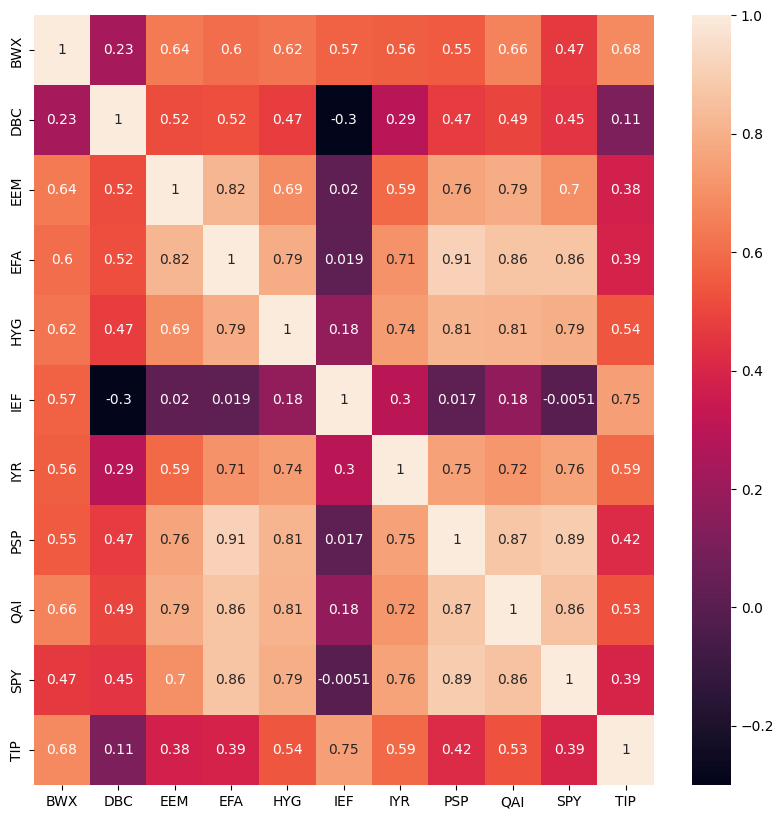

In [108]:
fig, ax = plt.subplots(figsize=(10,10))
correlation_matrix = excess_returns.corr()
sns.heatmap(correlation_matrix, 
        xticklabels=correlation_matrix.columns,
        yticklabels=correlation_matrix.columns, annot=True)

In [109]:
corr_rank = correlation_matrix.unstack().sort_values().to_frame('Correlations')
corr_rank = corr_rank[corr_rank['Correlations']!=1]
pair_max = corr_rank.index[-1]
pair_min = corr_rank.index[0]

print(f'MIN Correlation pair is {pair_min}')
print(f'MAX Correlation pair is {pair_max}')

MIN Correlation pair is ('IEF', 'DBC')
MAX Correlation pair is ('EFA', 'PSP')


### TIPS

In [110]:
correlation_matrix[correlation_matrix.index == 'TIP']

,BWX,DBC,EEM,EFA,HYG,IEF,IYR,PSP,QAI,SPY,TIP
TIP,0.6800,0.1144,0.3795,0.3867,0.5418,0.7450,0.5908,0.4159,0.5277,0.3936,1.0000


In [111]:
summary_stats_excess_returns[summary_stats_excess_returns.index.isin(['TIP','BWX','IEF'])]

,Mean,Vol,Sharpe,Min,Max,Skewness,Excess Kurtosis,VaR (0.05),CVaR (0.05)
BWX,-0.0119,0.0817,-0.1456,-0.0694,0.0780,-0.1848,0.7144,-0.0433,-0.0526
IEF,0.0139,0.0632,0.2206,-0.0476,0.0461,-0.0296,0.0983,-0.0301,-0.0387
TIP,0.0168,0.0513,0.3286,-0.0676,0.0422,-0.6771,2.7363,-0.0214,-0.0331


TIPS have **substantially** outperformed both domestic bonds (`IEF`) and international bonds (`BWX`) in terms of mean, vol, and Sharpe.

* TIPS have an above-average Sharpe ratio, (relative to these 11 assets.)
* TIPS have a low mean, but a very low volatility. 

Regarding correlation,
* TIPS have low correlations to most the other assets.
* TIPS have substantial correlation to IEF and BWX. But these correlations are ~60% and 70%--well below the correlation between SPY and most the equity-based investments. 

## 2.3

In [112]:
w_t = tangency_weights(multi_asset_etf_excess_ret)
mv_frontier = w_t.merge(summary_stats_excess_returns['Sharpe'], on=w_t.index).rename(columns={'key_0':'assets'}).set_index('assets')
mv_frontier

,Tangent Weights,Sharpe
assets,,
BWX,2.7303,-0.1456
DBC,-0.1112,-0.0539
EEM,-0.6157,0.1498
EFA,0.5307,0.3616
HYG,-0.8326,0.4833
IEF,-4.6825,0.2206
IYR,0.8771,0.4594
PSP,0.2770,0.4314
QAI,7.2206,0.3052


We see that the tangency weights ranking is quite different from the Sharpe rankings. (Correlation between the two series is only about 50%.)

In [113]:
w_tan_summary_statistics = summary_statistics_annualized(excess_returns @ w_t , annual_factor = 12)
w_tan_summary_statistics

,Mean,Vol,Sharpe,Min,Max,Skewness,Excess Kurtosis,VaR (0.05),CVaR (0.05)
Tangent Weights,-0.5273,0.3285,-1.6050,-0.2935,0.2436,-0.0518,0.1059,-0.1980,-0.2447


## 2.4

### TIPS dropped from the dataset

In [114]:
w_t_without_tips = tangency_weights(multi_asset_etf_excess_ret.drop(columns=['TIP']))
w_t_without_tips.columns = ['Tangency Weights with TIPS dropped']
w_t_without_tips

,Tangency Weights with TIPS dropped
BWX,3.0159
DBC,-0.0910
EEM,-0.6642
EFA,0.5406
HYG,-0.8716
IEF,-4.8324
IYR,0.9902
PSP,0.3249
QAI,7.9769
SPY,-5.3893


In [115]:
w_tan_wo_tips_summary_statistics = summary_statistics_annualized(excess_returns.drop(columns=['TIP']) @ w_t_without_tips , annual_factor = 12)
w_tan_wo_tips_summary_statistics.index = ['Tangency Weights with TIPS dropped']
w_tan_wo_tips_summary_statistics

,Mean,Vol,Sharpe,Min,Max,Skewness,Excess Kurtosis,VaR (0.05),CVaR (0.05)
Tangency Weights with TIPS dropped,-0.5808,0.3621,-1.6039,-0.3317,0.2668,-0.0850,0.1627,-0.2207,-0.2723


### TIPS Adjusted in the dataset

In [116]:
TIP_adj = 0.0012
multi_asset_etf_excess_ret_adj = multi_asset_etf_excess_ret.copy()
multi_asset_etf_excess_ret_adj['TIP'] += TIP_adj
w_t_adj_tips = tangency_weights(multi_asset_etf_excess_ret_adj)
w_t_adj_tips.columns = ['Tangency weights with TIPS adjusted']
w_t_adj_tips

,Tangency weights with TIPS adjusted
BWX,29.2601
DBC,1.7716
EEM,-5.1230
EFA,1.4514
HYG,-4.4601
IEF,-18.6046
IYR,11.3761
PSP,4.7252
QAI,77.4621
SPY,-49.9636


In [117]:
w_tan_adj_tips_summary_statistics = summary_statistics_annualized(multi_asset_etf_excess_ret_adj[multi_asset_etf_excess_ret_adj.columns] @ w_t_adj_tips , annual_factor = 12)
w_tan_adj_tips_summary_statistics.index = ['Tangency Weights with TIPS adjusted']
w_tan_adj_tips_summary_statistics

,Mean,Vol,Sharpe,Min,Max,Skewness,Excess Kurtosis,VaR (0.05),CVaR (0.05)
Tangency Weights with TIPS adjusted,-6.1740,3.6558,-1.6888,-3.8923,2.3362,-0.3432,0.7152,-2.4382,-2.9191


### Summarizing all the performance summary statistics:

In [118]:
pd.concat([w_tan_summary_statistics,w_tan_wo_tips_summary_statistics,w_tan_adj_tips_summary_statistics  ])

,Mean,Vol,Sharpe,Min,Max,Skewness,Excess Kurtosis,VaR (0.05),CVaR (0.05)
Tangent Weights,-0.5273,0.3285,-1.6050,-0.2935,0.2436,-0.0518,0.1059,-0.1980,-0.2447
Tangency Weights with TIPS dropped,-0.5808,0.3621,-1.6039,-0.3317,0.2668,-0.0850,0.1627,-0.2207,-0.2723
Tangency Weights with TIPS adjusted,-6.1740,3.6558,-1.6888,-3.8923,2.3362,-0.3432,0.7152,-2.4382,-2.9191


### Conclusions on TIPS

* Dropping TIPS from the investment set barely impacts the weights or the resulting performance.
* Adjusting the mean of TIPS upward even just 1 standard error substantially impacts the allocations and moderately boosts the resulting performance.

Based on just a mean-variance analysis, it seems one could reasonably go either way with TIPS as an alternate asset class. In the argument to keep it separate, there is more diversification between TIPS and bonds than between SPY and many other equity buckets Harvard has. On the other hand, TIPS mostly impact the allocation to domestic bonds and might be seen as another asset in that bucket.

# 3. Allocations

<i>This section is graded for a good-faith effort by your group. Submit your write-up- along with your supporting code.

* Continue with the same data file as the previous section.

* Suppose the investor has a targeted mean excess return (per month) of $\mutarg$ = 0.01.

Build the following portfolios:

#### Equally-weighted (EW)
Rescale the entire weighting vector to have target mean $\mutarg$. Thus, the $i$ element of the weight vector is,
$$\wEW_i = \frac{1}{n}$$

#### “Risk-parity” (RP)
Risk-parity is a term used in a variety of ways, but here we have in mind setting the weight of the portfolio to be proportional to the inverse of its full-sample variance estimate. Thus, the $i$ element of the weight vector is,
$$\wRP_i = \frac{1}{\sigma_i^2}$$

#### Regularized (REG)
Much like the Mean-Variance portfolio, set the weights proportional to 
$$\wREG \sim \widehat{\Sigma}^{-1}\mux$$
but this time, use a regularized covariance matrix,
$$\widehat{\Sigma} = \frac{\Sigma + \Sigma_D}{2}$$
where $\Sigma_D$ denotes a *diagonal* matrix of the security variances, with zeros in the off-diagonals.

Thus, $\widehat{\Sigma}$ is obtained from the usual covariance matrix, $\Sigma$, but shrinking all the covariances to half their estimated values. 


### Comparing

In order to compare all these allocation methods, (those above, along with the tangency portfolio obtained in the previous section,) rescale each weight vector, such that it has targeted mean return of $\mutarg$.

* Calculate the performance of each of these portfolios over the sample.
* Report their mean, volatility, and Sharpe ratio. 
* How do these compare across the four allocation methods?

In [122]:
target_mean = .01
excess_returns = multi_asset_etf_excess_ret[multi_asset_etf_excess_ret.columns] 
w_t_without_tips.loc['TIP'] = 0
wts = pd.DataFrame(index = excess_returns.columns, columns = ['tangency','tangency with TIPS dropped',
                                                              'tangency with TIPS adjusted','equal weights',
                                                              'risk parity','regularized'])


wts.loc[:,'tangency'] = tangency_weights(multi_asset_etf_excess_ret, cov_mat = 1).values
wts.loc[:,'tangency with TIPS dropped'] = w_t_without_tips.values
wts.loc[:,'tangency with TIPS adjusted'] = w_t_adj_tips.values
wts.loc[:,'equal weights'] = 1/len(excess_returns.columns)
wts.loc[:,'risk parity'] = 1/excess_returns.var()
wts.loc[:,'regularized'] = tangency_weights(multi_asset_etf_excess_ret, cov_mat = 0.5).values


wts *= target_mean / (excess_returns.mean()@wts)

wts



,tangency,tangency with TIPS dropped,tangency with TIPS adjusted,equal weights,risk parity,regularized
BWX,-0.6214,-0.6231,-0.6385,0.2716,0.5229,-0.6754
DBC,0.0253,0.0188,-0.0387,0.2716,0.1229,-0.1362
EEM,0.1401,0.1372,0.1118,0.2716,0.1077,-0.0662
EFA,-0.1208,-0.1117,-0.0317,0.2716,0.1506,0.0373
HYG,0.1895,0.1801,0.0973,0.2716,0.5839,0.3168
IEF,1.0657,0.9984,0.4060,0.2716,0.8733,0.3935
IYR,-0.1996,-0.2046,-0.2483,0.2716,0.1213,0.0803
PSP,-0.0630,-0.0671,-0.1031,0.2716,0.0753,0.0495
QAI,-1.6433,-1.6481,-1.6905,0.2716,1.4522,-0.1565
SPY,1.1161,1.1135,1.0904,0.2716,0.1704,0.6237


In [123]:
summary_statistics_annualized(excess_returns @ wts)

,Mean,Vol,Sharpe,Min,Max,Skewness,Excess Kurtosis,VaR (0.05),CVaR (0.05)
tangency,0.1200,0.0748,1.6050,-0.0554,0.0668,0.0518,0.1059,-0.0260,-0.0332
tangency with TIPS dropped,0.1200,0.0748,1.6039,-0.0551,0.0685,0.0850,0.1627,-0.0255,-0.0328
tangency with TIPS adjusted,0.1200,0.0798,1.5041,-0.0522,0.0837,0.3432,0.7152,-0.0253,-0.0346
equal weights,0.1200,0.2915,0.4116,-0.3499,0.2321,-0.6163,2.1572,-0.1214,-0.1891
risk parity,0.1200,0.3095,0.3877,-0.3221,0.2208,-0.5902,1.5654,-0.1408,-0.2030
regularized,0.1200,0.1026,1.1695,-0.0703,0.1066,-0.0949,1.0243,-0.0404,-0.0563


***

# 4. Out-of-Sample Performance

<i>This section is not graded, and you do not need to submit it. Still, we may discuss it in class, in which case, you would be expected to know it.

## 1. One-step Out-of-Sample (OOS) Performance
Let’s divide the sample to both compute a portfolio and then check its performance out of sample.
* Using only data through the end of 2021, compute the weights built in Section 3.
* Rescale the weights, (using just the in-sample data,) to set each allocation to have the same mean return of $\mutarg$.
* Using those weights, calculate the portfolio’s Sharpe ratio within that sample.
* Again using those weights, (derived using data through 2021,) calculate the portfolio’s OOS Sharpe ratio, which is based only on performance in 2022-2023.

## 2. Rolling OOS Performance

Iterate the Out-of-Sample performance every year, not just the final year. Namely,
* Start at the end of 2014, and calculate the weights through that time. Rescale them using the mean returns through that time.
* Apply the weights to the returns in the upcoming year, (2015.)
* Step forward a year in time, and recompute.
* Continue until again calculating the weights through 2022 and applying them to the returns in 2023.

Report the mean, volatility, and Sharpe from this dynamic approach for the following portfolios:
* mean-variance (tangency)
* equally-weighted
* risk-parity
* regularized

## 4.1

In [121]:
excess_returns_IS = multi_asset_etf_excess_ret.set_index('Date')[:'2020'].reset_index()
excess_returns_OOS = multi_asset_etf_excess_ret.set_index('Date')['2021':].reset_index()

excess_returns_in_sample = excess_returns_IS[excess_returns_IS.columns[1:]] 
excess_returns_out_of_sample = excess_returns_OOS[excess_returns_OOS.columns[1:]] 

excess_returns_IS_adj = excess_returns_IS.copy()
excess_returns_IS_adj['TIP'] +=TIP_adj

KeyError: "None of ['Date'] are in the columns"

In [24]:
target_mean = .015
wts_IS = pd.DataFrame(index = excess_returns_IS.columns[1:], columns = ['tangency','tangency with TIPS dropped',
                                                                      'tangency with TIPS adjusted','equal weights',
                                                                      'risk parity','regularized'])

IS_tangency_weights_wo_TIPS = tangency_weights(excess_returns_IS.drop(columns={'TIP'}) , cov_mat = 1)
IS_tangency_weights_wo_TIPS.loc['TIP'] = 0
IS_tangency_weights_w_TIPS_adj = tangency_weights(excess_returns_IS_adj, cov_mat = 1)

wts_IS.loc[:,'tangency'] = tangency_weights(excess_returns_IS, cov_mat = 1).values
wts_IS.loc[:,'tangency with TIPS dropped'] = IS_tangency_weights_wo_TIPS.values
wts_IS.loc[:,'tangency with TIPS adjusted'] = IS_tangency_weights_w_TIPS_adj.values
wts_IS.loc[:,'equal weights'] = 1/len(excess_returns_in_sample.columns)
wts_IS.loc[:,'risk parity'] = 1/(excess_returns_in_sample.var())
wts_IS.loc[:,'regularized'] = tangency_weights(excess_returns_IS, cov_mat = 0.5).values


wts_IS *= target_mean / (excess_returns_IS.mean()@wts_IS)

wts_IS



,tangency,tangency with TIPS dropped,tangency with TIPS adjusted,equal weights,risk parity,regularized
BWX,-0.0894,-0.0818,-0.1091,0.2227,0.4234,-0.1407
DBC,-0.1241,-0.1094,-0.1621,0.2227,0.0753,-0.1655
EEM,0.0214,0.0354,-0.0148,0.2227,0.0590,0.0002
EFA,0.1057,0.0865,0.1555,0.2227,0.0868,0.0531
HYG,0.8304,0.8201,0.8573,0.2227,0.3043,0.4656
IEF,0.8799,1.0433,0.4555,0.2227,0.7295,0.8207
IYR,-0.2342,-0.2315,-0.2413,0.2227,0.0705,0.0965
PSP,-0.4131,-0.4026,-0.4403,0.2227,0.0487,-0.0409
QAI,-1.3543,-1.3323,-1.4113,0.2227,0.9864,-0.0148
SPY,1.1348,1.1462,1.1052,0.2227,0.1177,0.4765


## in-sample performance

In [25]:
summary_statistics_annualized(excess_returns_in_sample @ wts_IS)

,Mean,Vol,Sharpe,Min,Max,Skewness,Excess Kurtosis,VaR (0.05),CVaR (0.05)
tangency,0.1800,0.0716,2.5134,-0.0306,0.0824,0.6172,1.1539,-0.0199,-0.0229
tangency with TIPS dropped,0.1800,0.0719,2.5042,-0.0297,0.0805,0.5920,0.9539,-0.0188,-0.0231
tangency with TIPS adjusted,0.1800,0.0734,2.4534,-0.0328,0.0927,0.6651,1.6207,-0.0207,-0.0243
equal weights,0.1800,0.2466,0.7299,-0.2906,0.2259,-0.3601,2.5708,-0.0869,-0.1449
risk parity,0.1800,0.1868,0.9634,-0.1893,0.1272,-0.4462,0.9987,-0.0882,-0.1101
regularized,0.1800,0.1092,1.6483,-0.0759,0.1135,0.1205,0.5805,-0.0366,-0.0514


## out-of-sample performance

In [26]:
summary_statistics_annualized(excess_returns_out_of_sample @ wts_IS)

,Mean,Vol,Sharpe,Min,Max,Skewness,Excess Kurtosis,VaR (0.05),CVaR (0.05)
tangency,0.0305,0.1509,0.2020,-0.0789,0.1106,0.5960,0.7170,-0.0548,-0.0693
tangency with TIPS dropped,0.0261,0.1497,0.1746,-0.0825,0.1091,0.5180,0.6623,-0.0556,-0.0715
tangency with TIPS adjusted,0.0418,0.1564,0.2674,-0.0695,0.1226,0.7581,0.8561,-0.0568,-0.0638
equal weights,-0.0190,0.2863,-0.0663,-0.2020,0.1551,-0.3723,-0.0696,-0.1342,-0.1776
risk parity,-0.1638,0.3040,-0.5390,-0.2382,0.1556,-0.3400,0.3672,-0.1528,-0.1964
regularized,-0.0695,0.2037,-0.3410,-0.1344,0.1323,-0.0950,0.0757,-0.0974,-0.1226


## 4.2

## Rebalancing Annually

In [27]:
year_start = 2013
year_end = 2023
portOOS = pd.DataFrame(index =multi_asset_etf_excess_ret.set_index('Date').index,  columns=wts.columns,dtype=float)


for current_year in range(year_start, year_end):
    next_year = current_year + 1
    
    currentIS_excess_return = multi_asset_etf_excess_ret.set_index('Date').loc[:str(year_start)].reset_index()
    currentOOS_excess_return = multi_asset_etf_excess_ret.set_index('Date').loc[str(next_year)].reset_index()
    
    current_excess_returns_in_sample = currentIS_excess_return[currentIS_excess_return.columns[1:]] 
    current_excess_returns_out_of_sample = currentOOS_excess_return[currentOOS_excess_return.columns[1:]] 

    current_excess_returns_IS_adj = currentIS_excess_return.copy()
    current_excess_returns_IS_adj['TIP'] +=TIP_adj
    
    target_mean = .015
    wtsIS = pd.DataFrame(index=wts.index, columns=wts.columns, dtype=float)

    IS_tangency_weights_wo_TIPS = tangency_weights(currentIS_excess_return.drop(columns={'TIP'}) , cov_mat = 1)
    IS_tangency_weights_wo_TIPS.loc['TIP'] = 0
    IS_tangency_weights_w_TIPS_adj = tangency_weights(current_excess_returns_IS_adj, cov_mat = 1)

    wtsIS.loc[:,'tangency'] = tangency_weights(currentIS_excess_return, cov_mat = 1).values
    wtsIS.loc[:,'tangency with TIPS dropped'] = IS_tangency_weights_wo_TIPS.values
    wtsIS.loc[:,'tangency with TIPS adjusted'] = IS_tangency_weights_w_TIPS_adj.values
    wtsIS.loc[:,'equal weights'] = 1/len(currentIS_excess_return.columns)
    wtsIS.loc[:,'risk parity'] = 1/(currentIS_excess_return.var())
    wtsIS.loc[:,'regularized'] = tangency_weights(currentIS_excess_return, cov_mat = 0.5).values


    wtsIS *= target_mean / (currentIS_excess_return.mean()@wtsIS)
    portOOS.loc[str(next_year)] = currentOOS_excess_return.set_index('Date') @ wtsIS


portOOS.tail()

,tangency,tangency with TIPS dropped,tangency with TIPS adjusted,equal weights,risk parity,regularized
Date,,,,,,
2023-04-30,0.0097,0.0108,0.0091,0.0068,0.0036,0.0089
2023-05-31,0.0026,0.0016,0.0032,-0.0376,-0.0473,-0.0199
2023-06-30,0.0117,0.0136,0.0107,0.0347,0.0189,0.0177
2023-07-31,-0.0199,-0.0168,-0.0215,0.0365,0.0224,0.0032
2023-08-31,-0.0026,-0.0030,-0.0024,-0.0345,-0.0394,-0.0181


In [28]:
summary_statistics_annualized(portOOS)

,Mean,Vol,Sharpe,Min,Max,Skewness,Excess Kurtosis,VaR (0.05),CVaR (0.05)
tangency,0.1130,0.0914,1.2364,-0.0607,0.1054,0.2508,1.7373,-0.0313,-0.0486
tangency with TIPS dropped,0.1121,0.0899,1.2468,-0.0674,0.0961,0.0998,1.4576,-0.0325,-0.0484
tangency with TIPS adjusted,0.1135,0.0928,1.2237,-0.0574,0.1100,0.3247,1.9118,-0.0327,-0.0492
equal weights,0.0360,0.1399,0.2572,-0.1693,0.1033,-0.7484,2.6941,-0.0588,-0.0955
risk parity,0.0299,0.1493,0.2001,-0.1592,0.1066,-0.7512,2.0587,-0.0686,-0.1097
regularized,0.0656,0.1088,0.6029,-0.1031,0.0986,-0.5196,1.8100,-0.0512,-0.0754


## Rebalancing Monthly

In [29]:
portOOS = pd.DataFrame(index =multi_asset_etf_excess_ret.set_index('Date').index,  columns=wts.columns,dtype=float)

for i, month in enumerate(portOOS.index):
    if i > 50:
        currentIS_excess_return = multi_asset_etf_excess_ret.set_index('Date').iloc[:i].reset_index()
        currentOOS_excess_return = multi_asset_etf_excess_ret.set_index('Date').iloc[i]

        OOS = multi_asset_etf_excess_ret.set_index('Date').iloc[i].reset_index()
        current_excess_returns_in_sample = currentIS_excess_return[currentIS_excess_return.columns[1:]] 
        current_excess_returns_out_of_sample = OOS[OOS.columns[1:]] 
        
        current_excess_returns_IS_adj = currentIS_excess_return.copy()
        current_excess_returns_IS_adj['TIP'] +=TIP_adj

        target_mean = .015
        wtsIS = pd.DataFrame(index=wts.index, columns=wts.columns, dtype=float)

        IS_tangency_weights_wo_TIPS = tangency_weights(currentIS_excess_return.drop(columns={'TIP'}) , cov_mat = 1)
        IS_tangency_weights_wo_TIPS.loc['TIP'] = 0
        IS_tangency_weights_w_TIPS_adj = tangency_weights(current_excess_returns_IS_adj, cov_mat = 1)

        wtsIS.loc[:,'tangency'] = tangency_weights(currentIS_excess_return, cov_mat = 1).values
        wtsIS.loc[:,'tangency with TIPS dropped'] = IS_tangency_weights_wo_TIPS.values
        wtsIS.loc[:,'tangency with TIPS adjusted'] = IS_tangency_weights_w_TIPS_adj.values
        wtsIS.loc[:,'equal weights'] = 1/len(currentIS_excess_return.columns)
        wtsIS.loc[:,'risk parity'] = 1/(currentIS_excess_return.var())
        wtsIS.loc[:,'regularized'] = tangency_weights(currentIS_excess_return, cov_mat = 0.5).values


        wtsIS *= target_mean / (currentIS_excess_return.mean()@wtsIS)
        portOOS.iloc[i,:] = currentOOS_excess_return @ wtsIS




    
portOOS.tail()

,tangency,tangency with TIPS dropped,tangency with TIPS adjusted,equal weights,risk parity,regularized
Date,,,,,,
2023-04-30,0.0042,0.0056,-0.0001,0.0143,0.0071,0.0124
2023-05-31,0.0081,0.0079,0.0088,-0.0792,-0.0997,-0.0151
2023-06-30,0.0166,0.0179,0.0121,0.0759,0.0392,0.0326
2023-07-31,-0.0251,-0.0232,-0.0319,0.0781,0.0461,-0.0010
2023-08-31,0.0013,0.0017,-0.0008,-0.0720,-0.0847,-0.0131


In [30]:
summary_statistics_annualized(portOOS)

,Mean,Vol,Sharpe,Min,Max,Skewness,Excess Kurtosis,VaR (0.05),CVaR (0.05)
tangency,0.1275,0.0977,1.3052,-0.0517,0.1096,0.5655,1.4710,-0.0331,-0.0419
tangency with TIPS dropped,0.1284,0.0964,1.3318,-0.0562,0.1085,0.4852,1.3621,-0.0301,-0.0417
tangency with TIPS adjusted,0.1297,0.1016,1.2766,-0.0486,0.1127,0.7268,1.7653,-0.0339,-0.0411
equal weights,0.0804,0.2529,0.3180,-0.3197,0.1998,-0.7039,3.9960,-0.1036,-0.1683
risk parity,0.0505,0.2564,0.1968,-0.3213,0.2444,-0.7154,4.2611,-0.1073,-0.1885
regularized,0.0753,0.1304,0.5778,-0.1268,0.1384,-0.2596,2.3086,-0.0687,-0.0852


# 5. Without a Riskless Asset

<i>This section is not graded, and you do not need to submit it. Still, we may discuss it in class, in which case, you would be expected to know it.

Re-do Section 2 above, but in the model without a risk-free rate.

That is, build the MV allocation using the two-part formula in the `Mean-Variance` section of the notes.
* This essentially substitutes the risk-free rate with the minimum-variance portfolio.
* Now, the allocation depends nonlinearly on the target mean return, $\mutarg$. (With a risk-free rate, we simply scale the weights up and down to achieve the mean return.)

You will find that, conceptually, the answers are very similar. 

## Building MV allocation for a target return of 0.0015

In [31]:
mv_portfolio(0.0015, multi_asset_etf_tot_ret)

,MV Weights,tangency weights,GMV weights
BWX,-0.1475,-0.8631,-0.1394
DBC,0.0033,0.0185,0.0032
EEM,-0.0735,0.1066,-0.0755
EFA,0.0207,0.2528,0.0180
HYG,0.1596,0.8987,0.1513
IEF,0.0688,1.0482,0.0577
IYR,-0.0120,-0.1350,-0.0106
PSP,-0.1262,-0.7424,-0.1193
QAI,1.0081,-1.2265,1.0333
SPY,-0.0598,1.3678,-0.0759


### Illiustrating the MV frontier when a riskless asset is not available

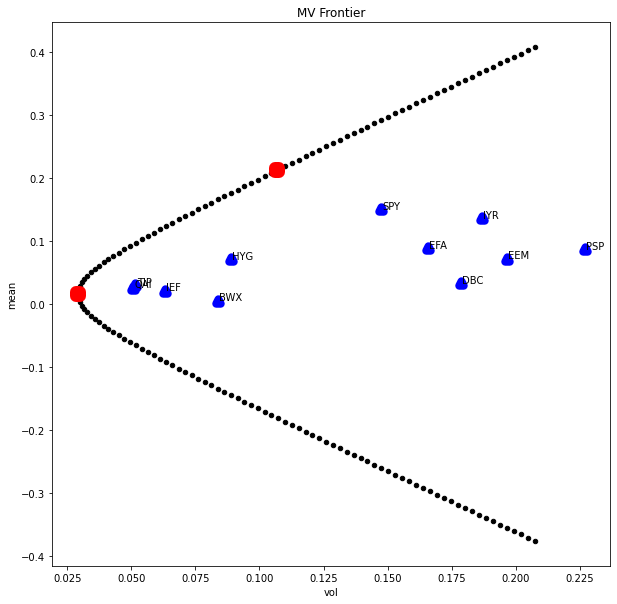

In [32]:
omega_tan = tangency_weights(multi_asset_etf_tot_ret, cov_mat = 1)
omega_gmv = gmv_weights(multi_asset_etf_tot_ret)
omega = pd.concat([omega_tan,omega_gmv],axis=1)
omega.columns = ['tangency','gmv']

delta_grid = np.linspace(-2,2,150)
mv_frame = pd.DataFrame(columns=['mean','vol'],index=delta_grid)
for i, delta in enumerate(delta_grid):
    omega_mv = (delta * omega_tan).values + ((1-delta)*omega_gmv).values
    rets_p = multi_asset_etf_tot_ret[multi_asset_etf_tot_ret.columns[1:]] @ omega_mv
    mv_frame['mean'].iloc[i] = rets_p.mean().values[0] * 12
    mv_frame['vol'].iloc[i] = rets_p.std().values[0] * np.sqrt(12)
    
rets_special = pd.DataFrame(index=multi_asset_etf_tot_ret.set_index('Date').index)
rets_special['tan'] = (multi_asset_etf_tot_ret[multi_asset_etf_tot_ret.columns[1:]] @ omega_tan.values).values
rets_special['gmv'] = (multi_asset_etf_tot_ret[multi_asset_etf_tot_ret.columns[1:]] @ omega_gmv.values).values

mv_assets = pd.concat([multi_asset_etf_tot_ret.set_index('Date').mean()* 12,multi_asset_etf_tot_ret.set_index('Date').std().dropna() * np.sqrt(12)],axis=1)
mv_special = pd.concat([rets_special.mean() * 12, rets_special.std() * np.sqrt(12)],axis=1)
mv_assets.columns = ['mean','vol']
mv_special.columns = ['mean','vol']

ax = mv_frame.plot.scatter(x='vol',y='mean', c='k', figsize=(10,10), title='MV Frontier')
mv_assets.plot.scatter(x='vol',y='mean',ax=ax, c='b', marker='^', linewidth=8)
mv_special.plot.scatter(x='vol',y='mean',ax=ax, c='r', marker='s', linewidth=12)

for i in range(mv_assets.shape[0]):
    plt.text(x=mv_assets['vol'][i]+.0005, y=mv_assets['mean'][i]+.0005, s=mv_assets.index[i])

***